In [1]:
import pandas as pd

data = pd.read_csv("../pm2_data.csv")

data.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [2]:
data.isnull().sum()

Unnamed: 0         0
Site               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.      0
AQI                0
AQI Category     202
Raw Conc.          0
Conc. Unit         0
Duration           0
QC Name            0
dtype: int64

In [3]:
data.dropna(inplace=True)

In [4]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Missing', 'Suspect'], dtype=object)

In [5]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.drop('Site',axis=1, inplace=True)
data.drop('Parameter',axis=1, inplace=True)
data.drop('Date (LT)',axis=1, inplace=True)
data.drop('Conc. Unit',axis=1, inplace=True)
data.drop('Duration',axis=1, inplace=True)


In [6]:
# data.drop('AQI',axis=1, inplace=True)

In [7]:
data.drop('QC Name',axis=1, inplace=True)

In [8]:
data.tail()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
33515,2022,10,10,20,33.7,96,Moderate,46.0
33516,2022,10,10,21,36.8,104,Unhealthy for Sensitive Groups,40.0
33517,2022,10,10,22,35.4,100,Moderate,34.0
33518,2022,10,10,23,33.2,95,Moderate,31.0
33519,2022,10,11,0,33.1,95,Moderate,33.0


In [9]:
data['AQI Category'].unique()

array(['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous', 'Good'], dtype=object)

In [10]:
# Hot encoding
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder
# initializing one hot encoding
encoding = OneHotEncoder()


In [11]:
# applying one hot encoding in python
#transformed_data = encoding.fit_transform(data[['QC Name']])

In [12]:
# Getting one hot encoded categories
#print(encoding.categories_)

In [13]:
# adding the encoded values
#data[encoding.categories_[0]] = transformed_data.toarray()

# deleting the uncoded one
#data.drop('QC Name', axis=1, inplace=True)

# data heading
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,61,Moderate,20.0
2,2019,2,6,8,19.1,66,Moderate,21.0
3,2019,2,6,9,22.4,73,Moderate,25.0
4,2019,2,6,10,30.9,91,Moderate,39.0
5,2019,2,6,11,35.0,99,Moderate,39.0


In [14]:
# # Import sklearn labelencoder
# from sklearn import preprocessing
  
# # initializing sklearn labelencoder
# label_encoder = preprocessing.LabelEncoder()
  
# # encoding marrige column
# data['AQI Category']= label_encoder.fit_transform(data['AQI Category'])


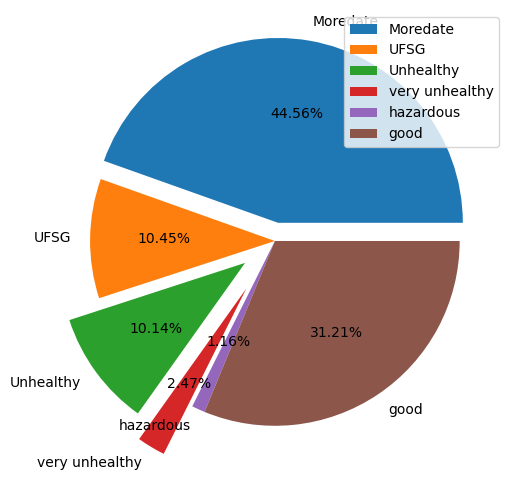

In [15]:
# importing numpy
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = ( 15, 6))

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# creating variables
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i =="Moderate":
        one+=1
    elif i =='Unhealthy for Sensitive Groups':
        two+=1
    elif i == 'Unhealthy':
        three+=1
    elif i == 'Very Unhealthy':
        four+=1
    elif i == 'Hazardous':
        five+=1
    elif i == 'Good':
        six+=1
# creating numpy arry
labels = ['Moredate', 'UFSG', 'Unhealthy', 'very unhealthy', 'hazardous', 'good']

values = np.array([one, two, three, four, five, six])
plt.pie(values, labels = labels, autopct='%1.2f%%', explode = explode,)
plt.legend()
plt.show()

In [16]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i ==0:
        one+=1
    elif i ==1:
        two+=1
    elif i == 2:
        three+=1
    elif i == 3:
        four+=1
    elif i == 4:
        five+=1
    elif i == 5:
        six+=1

In [17]:
print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

0
0
0
0
0
0


In [18]:
# splitting the dataset into input and output
Input = data.drop('AQI Category', axis=1)

Output =data['AQI Category']

In [19]:
from sklearn.model_selection import train_test_split


# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=40)

In [20]:
X_train.shape

(23322, 7)

In [24]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.092914
0:	learn: 1.3801629	total: 54.8ms	remaining: 54.8s
1:	learn: 1.1266930	total: 62.5ms	remaining: 31.2s
2:	learn: 0.9468288	total: 70.7ms	remaining: 23.5s
3:	learn: 0.8122669	total: 78.9ms	remaining: 19.6s
4:	learn: 0.7059549	total: 86.6ms	remaining: 17.2s
5:	learn: 0.6195134	total: 94.4ms	remaining: 15.6s
6:	learn: 0.5454241	total: 103ms	remaining: 14.6s
7:	learn: 0.4846037	total: 110ms	remaining: 13.7s
8:	learn: 0.4312457	total: 118ms	remaining: 13s
9:	learn: 0.3852354	total: 125ms	remaining: 12.4s
10:	learn: 0.3447341	total: 133ms	remaining: 11.9s
11:	learn: 0.3089415	total: 140ms	remaining: 11.5s
12:	learn: 0.2787657	total: 148ms	remaining: 11.2s
13:	learn: 0.2511359	total: 155ms	remaining: 10.9s
14:	learn: 0.2269223	total: 163ms	remaining: 10.7s
15:	learn: 0.2054311	total: 170ms	remaining: 10.5s
16:	learn: 0.1855298	total: 178ms	remaining: 10.3s
17:	learn: 0.1686904	total: 185ms	remaining: 10.1s
18:	learn: 0.1529122	total: 193ms	remaining: 9.95s
19:	lea

174:	learn: 0.0009980	total: 1.41s	remaining: 6.63s
175:	learn: 0.0009965	total: 1.42s	remaining: 6.63s
176:	learn: 0.0009914	total: 1.42s	remaining: 6.62s
177:	learn: 0.0009879	total: 1.43s	remaining: 6.62s
178:	learn: 0.0009847	total: 1.44s	remaining: 6.6s
179:	learn: 0.0009719	total: 1.45s	remaining: 6.59s
180:	learn: 0.0009705	total: 1.46s	remaining: 6.58s
181:	learn: 0.0009662	total: 1.46s	remaining: 6.57s
182:	learn: 0.0009630	total: 1.47s	remaining: 6.56s
183:	learn: 0.0009620	total: 1.48s	remaining: 6.55s
184:	learn: 0.0009255	total: 1.49s	remaining: 6.55s
185:	learn: 0.0009222	total: 1.49s	remaining: 6.54s
186:	learn: 0.0009193	total: 1.5s	remaining: 6.53s
187:	learn: 0.0009185	total: 1.51s	remaining: 6.51s
188:	learn: 0.0009162	total: 1.51s	remaining: 6.5s
189:	learn: 0.0009145	total: 1.52s	remaining: 6.49s
190:	learn: 0.0008963	total: 1.53s	remaining: 6.48s
191:	learn: 0.0008930	total: 1.54s	remaining: 6.47s
192:	learn: 0.0008904	total: 1.54s	remaining: 6.46s
193:	learn: 0.0

341:	learn: 0.0004268	total: 2.83s	remaining: 5.44s
342:	learn: 0.0004265	total: 2.84s	remaining: 5.43s
343:	learn: 0.0004258	total: 2.85s	remaining: 5.43s
344:	learn: 0.0004254	total: 2.85s	remaining: 5.42s
345:	learn: 0.0004248	total: 2.86s	remaining: 5.41s
346:	learn: 0.0004244	total: 2.87s	remaining: 5.4s
347:	learn: 0.0004236	total: 2.88s	remaining: 5.39s
348:	learn: 0.0004234	total: 2.88s	remaining: 5.38s
349:	learn: 0.0004229	total: 2.89s	remaining: 5.37s
350:	learn: 0.0004160	total: 2.9s	remaining: 5.36s
351:	learn: 0.0004157	total: 2.91s	remaining: 5.36s
352:	learn: 0.0004084	total: 2.92s	remaining: 5.35s
353:	learn: 0.0004076	total: 2.93s	remaining: 5.34s
354:	learn: 0.0004028	total: 2.94s	remaining: 5.33s
355:	learn: 0.0004020	total: 2.94s	remaining: 5.33s
356:	learn: 0.0004018	total: 2.95s	remaining: 5.32s
357:	learn: 0.0004010	total: 2.96s	remaining: 5.31s
358:	learn: 0.0004007	total: 2.97s	remaining: 5.3s
359:	learn: 0.0004000	total: 2.98s	remaining: 5.29s
360:	learn: 0.0

516:	learn: 0.0002556	total: 4.26s	remaining: 3.98s
517:	learn: 0.0002553	total: 4.26s	remaining: 3.97s
518:	learn: 0.0002552	total: 4.27s	remaining: 3.96s
519:	learn: 0.0002550	total: 4.28s	remaining: 3.95s
520:	learn: 0.0002548	total: 4.29s	remaining: 3.95s
521:	learn: 0.0002546	total: 4.3s	remaining: 3.94s
522:	learn: 0.0002545	total: 4.31s	remaining: 3.93s
523:	learn: 0.0002543	total: 4.32s	remaining: 3.92s
524:	learn: 0.0002542	total: 4.33s	remaining: 3.91s
525:	learn: 0.0002540	total: 4.33s	remaining: 3.9s
526:	learn: 0.0002538	total: 4.34s	remaining: 3.9s
527:	learn: 0.0002534	total: 4.35s	remaining: 3.89s
528:	learn: 0.0002532	total: 4.36s	remaining: 3.88s
529:	learn: 0.0002530	total: 4.37s	remaining: 3.87s
530:	learn: 0.0002527	total: 4.38s	remaining: 3.87s
531:	learn: 0.0002509	total: 4.39s	remaining: 3.86s
532:	learn: 0.0002508	total: 4.39s	remaining: 3.85s
533:	learn: 0.0002506	total: 4.4s	remaining: 3.84s
534:	learn: 0.0002477	total: 4.41s	remaining: 3.83s
535:	learn: 0.00

688:	learn: 0.0001845	total: 5.68s	remaining: 2.56s
689:	learn: 0.0001843	total: 5.69s	remaining: 2.56s
690:	learn: 0.0001842	total: 5.7s	remaining: 2.55s
691:	learn: 0.0001841	total: 5.71s	remaining: 2.54s
692:	learn: 0.0001831	total: 5.72s	remaining: 2.53s
693:	learn: 0.0001829	total: 5.72s	remaining: 2.52s
694:	learn: 0.0001828	total: 5.73s	remaining: 2.52s
695:	learn: 0.0001827	total: 5.74s	remaining: 2.51s
696:	learn: 0.0001827	total: 5.75s	remaining: 2.5s
697:	learn: 0.0001826	total: 5.76s	remaining: 2.49s
698:	learn: 0.0001825	total: 5.76s	remaining: 2.48s
699:	learn: 0.0001824	total: 5.77s	remaining: 2.47s
700:	learn: 0.0001813	total: 5.78s	remaining: 2.46s
701:	learn: 0.0001812	total: 5.79s	remaining: 2.46s
702:	learn: 0.0001796	total: 5.79s	remaining: 2.45s
703:	learn: 0.0001796	total: 5.8s	remaining: 2.44s
704:	learn: 0.0001795	total: 5.81s	remaining: 2.43s
705:	learn: 0.0001794	total: 5.82s	remaining: 2.42s
706:	learn: 0.0001784	total: 5.83s	remaining: 2.42s
707:	learn: 0.0

862:	learn: 0.0001462	total: 7.32s	remaining: 1.16s
863:	learn: 0.0001461	total: 7.33s	remaining: 1.15s
864:	learn: 0.0001461	total: 7.34s	remaining: 1.15s
865:	learn: 0.0001460	total: 7.35s	remaining: 1.14s
866:	learn: 0.0001459	total: 7.36s	remaining: 1.13s
867:	learn: 0.0001459	total: 7.37s	remaining: 1.12s
868:	learn: 0.0001454	total: 7.38s	remaining: 1.11s
869:	learn: 0.0001448	total: 7.39s	remaining: 1.1s
870:	learn: 0.0001447	total: 7.4s	remaining: 1.09s
871:	learn: 0.0001447	total: 7.41s	remaining: 1.09s
872:	learn: 0.0001446	total: 7.42s	remaining: 1.08s
873:	learn: 0.0001446	total: 7.43s	remaining: 1.07s
874:	learn: 0.0001444	total: 7.44s	remaining: 1.06s
875:	learn: 0.0001434	total: 7.45s	remaining: 1.05s
876:	learn: 0.0001433	total: 7.46s	remaining: 1.05s
877:	learn: 0.0001432	total: 7.47s	remaining: 1.04s
878:	learn: 0.0001432	total: 7.48s	remaining: 1.03s
879:	learn: 0.0001431	total: 7.49s	remaining: 1.02s
880:	learn: 0.0001431	total: 7.5s	remaining: 1.01s
881:	learn: 0.0

In [25]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

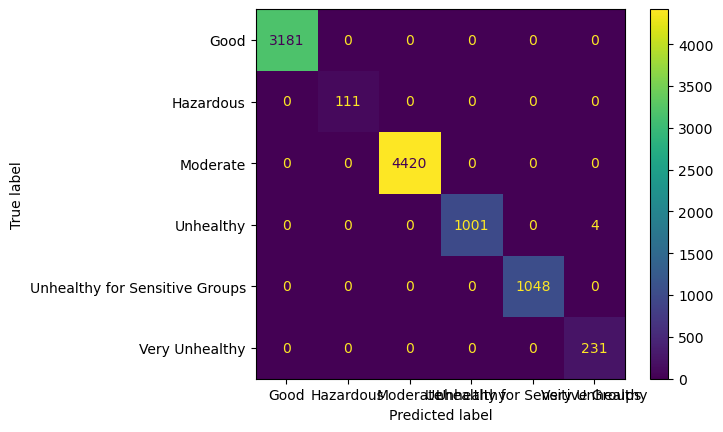

In [26]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [27]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, catboost_pred))

The accuracy is:  0.9995998399359743


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))


                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      3181
                     Hazardous       1.00      1.00      1.00       111
                      Moderate       1.00      1.00      1.00      4420
                     Unhealthy       1.00      1.00      1.00      1005
Unhealthy for Sensitive Groups       1.00      1.00      1.00      1048
                Very Unhealthy       0.98      1.00      0.99       231

                      accuracy                           1.00      9996
                     macro avg       1.00      1.00      1.00      9996
                  weighted avg       1.00      1.00      1.00      9996



In [29]:
catboost_pred_train = CatBoost_clf.predict(X_train)

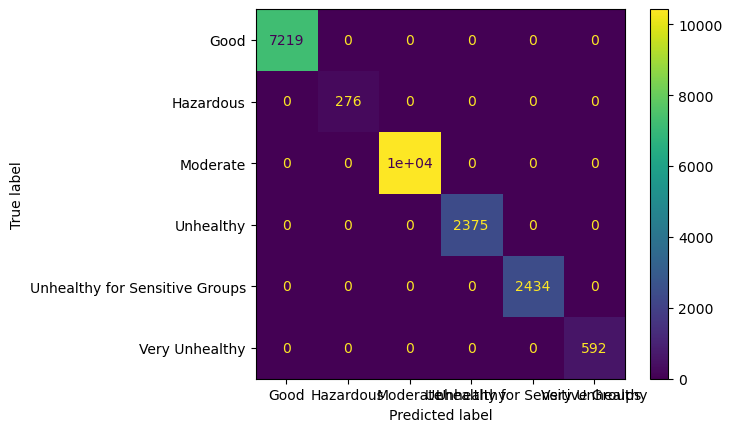

In [30]:
cm = confusion_matrix(y_train, catboost_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [31]:
# printing
print("The accuracy is: ", accuracy_score(y_train, catboost_pred_train))

The accuracy is:  1.0


In [32]:
print(classification_report(y_train, catboost_pred_train))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      7219
                     Hazardous       1.00      1.00      1.00       276
                      Moderate       1.00      1.00      1.00     10426
                     Unhealthy       1.00      1.00      1.00      2375
Unhealthy for Sensitive Groups       1.00      1.00      1.00      2434
                Very Unhealthy       1.00      1.00      1.00       592

                      accuracy                           1.00     23322
                     macro avg       1.00      1.00      1.00     23322
                  weighted avg       1.00      1.00      1.00     23322



In [33]:
import pickle
pickle.dump(CatBoost_clf, open('CatBoost', 'wb'))

In [30]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [31]:
# making prediction 
clf_pred = model_Clf.predict(X_test)
clf_pred_train= model_Clf.predict(X_train)

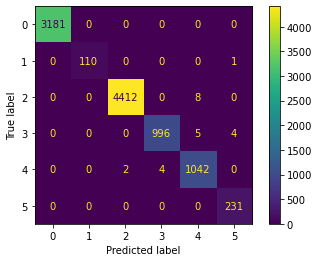

In [32]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [33]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9975990396158463


In [34]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      0.99      1.00       111
           2       1.00      1.00      1.00      4420
           3       1.00      0.99      0.99      1005
           4       0.99      0.99      0.99      1048
           5       0.98      1.00      0.99       231

    accuracy                           1.00      9996
   macro avg       0.99      1.00      0.99      9996
weighted avg       1.00      1.00      1.00      9996



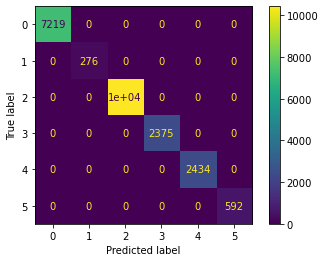

In [35]:
cm = confusion_matrix(y_train, clf_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [36]:
print("The accuracy is: ", accuracy_score(y_train, clf_pred_train))
print(classification_report(y_train, clf_pred_train))

The accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [37]:
# importing sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )

In [38]:
# model training
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
# making predictions
y_pred = classifer.predict(X_test)
y_pred_train = classifer.predict(X_train)

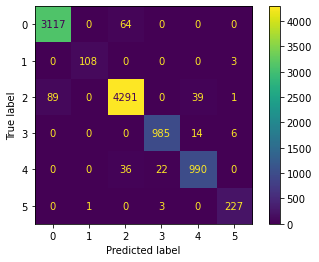

In [44]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, y_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [45]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy 
accuracy_score(y_test,y_pred) 

0.97218887555022

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3181
           1       0.99      0.97      0.98       111
           2       0.98      0.97      0.97      4420
           3       0.98      0.98      0.98      1005
           4       0.95      0.94      0.95      1048
           5       0.96      0.98      0.97       231

    accuracy                           0.97      9996
   macro avg       0.97      0.97      0.97      9996
weighted avg       0.97      0.97      0.97      9996



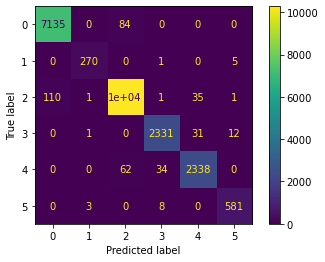

In [47]:
cm = confusion_matrix(y_train, y_pred_train, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [48]:
print("The accuracy is: ", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

The accuracy is:  0.9833204699425435
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7219
           1       0.98      0.98      0.98       276
           2       0.99      0.99      0.99     10426
           3       0.98      0.98      0.98      2375
           4       0.97      0.96      0.97      2434
           5       0.97      0.98      0.98       592

    accuracy                           0.98     23322
   macro avg       0.98      0.98      0.98     23322
weighted avg       0.98      0.98      0.98     23322



In [170]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [195]:
# importing required module for Neural Networks for Classification using TensorFlow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

In [196]:
# defineNeural Networks for Classification using TensorFlow model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(6))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

In [197]:
# adding output layer 
model.add(Dense(6, activation='softmax'))

In [198]:
# compile the Neural Networks for Classification using TensorFlow model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
729/729 [==============================] - 2s 2ms/step - loss: 526.0876 - accuracy: 0.3186
Epoch 2/50
729/729 [==============================] - 1s 2ms/step - loss: 3.6266 - accuracy: 0.7104
Epoch 3/50
729/729 [==============================] - 1s 2ms/step - loss: 2.0820 - accuracy: 0.8239
Epoch 4/50
729/729 [==============================] - 1s 2ms/step - loss: 1.6742 - accuracy: 0.8436
Epoch 5/50
729/729 [==============================] - 2s 2ms/step - loss: 1.3785 - accuracy: 0.8564
Epoch 6/50
729/729 [==============================] - 1s 2ms/step - loss: 1.0989 - accuracy: 0.8706
Epoch 7/50
729/729 [==============================] - 2s 2ms/step - loss: 0.9099 - accuracy: 0.8695
Epoch 8/50
729/729 [==============================] - 1s 2ms/step - loss: 0.7967 - accuracy: 0.8671
Epoch 9/50
729/729 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.8721
Epoch 10/50
729/729 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.88

In [199]:
# evaluate Neural Networks for Classification using TensorFlow
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9688
Test Accuracy: 0.9687874913215637


In [ ]:
print(classification_report(y_test, y_pred))